In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [150]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def compute_cost(X, y, weights, bias):
    m = len(y)
    Z = np.dot(X, weights)+bias
    y1 = sigmoid(Z)

    cost = -(1/m)*np.sum(y*np.log(y1)+(1-y)*np.log(1-y1))
    return cost

def gradient_descent(X, y, weights, bias, learning_rate, epochs, cost):
    for _ in range(epochs):
        m = weights.shape[0]
        Z = np.dot(X, weights)+bias
        y1 = sigmoid(Z)

        dw = (1/m)*np.dot(X.T, y1-y)
        db = (1/m)*np.sum(y1-y)
        cost.append(compute_cost(X, y, weights, bias))

        weights -= learning_rate*dw
        bias -= learning_rate*db

    return weights, bias

def predict(X, weights, bias):
    Z = np.dot(X, weights)+bias
    y1 = sigmoid(Z)
    return (y1 >= 0.5).astype(int)

def find_accuracy(y, y1):
    return np.sum(y==y1)/y.shape[0]*100

In [166]:
X, y = make_classification(1000, 10, random_state=42)

print(X.shape)
n_features = X.shape[1]
weights = np.zeros(n_features)
bias = 0
cost = []
learning_rate = 0.01
epochs = 100

weights, bias = gradient_descent(X, y, weights, bias, learning_rate, epochs, cost)

(1000, 10)


In [167]:
y1 = predict(X, weights, bias)
print(find_accuracy(y, y1))

85.7


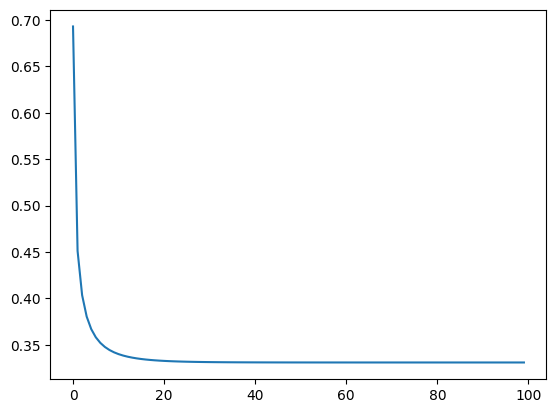

In [168]:
plt.plot(cost)

In [169]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
clf.score(X, y)

0.859